<h1>Connectionist Computing (COMP30230/41390) - Programming Assignment</h1>
<h3>(Mandatory Part)</h3>
<br>
Student Name: **Fan Li** <br>
Student Number: **16212155** 

-------

<h3> Task1 - Multilayer Perceptron (MLP) for XOR function: </h3>

<h4> Import packages for calculation, plotting and pre-processing</h4>

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
%matplotlib inline

<h4> MLP class for mandatory part</h4>

In [2]:
class MLP(object):
    def __init__(self, NI, NH, NO):
        self.NI = NI  # the number of input layer
        self.NH = NH  # the number of hidden layer
        self.NO = NO  # the number of output layer
        np.random.seed(4)  # for reproducibility
        # Initialize the weights with normalization
        self.W1 = np.random.randn(self.NI, self.NH) / np.sqrt(self.NI)  # weights for lower layer (input layer to hidden layer)
        self.W2 = np.random.randn(self.NH, self.NO) / np.sqrt(self.NH)  # weights for upper layer (hidden layer to output layer)
    
    def forward(self, X):
        ''' The forward propagation through the network '''
        self.z1 = np.dot(X, self.W1)  
        self.h = self.tanh(self.z1)  # activation on hidden layer
        self.z2 = np.dot(self.h, self.W2) 
        o = self.tanh(self.z2)  # activation on output layer
        return o 
    
    def backward(self, X, y, o):
        ''' The backward propagation through the network '''
        self.o_error = o - y 
        self.o_delta = self.tanhPrime(o) * self.o_error  # derivative of tanh to error on output layer
        self.h_error = np.dot(self.o_delta, self.W2.T)  # the error on hidden layer
        self.h_delta = self.tanhPrime(self.h) * self.h_error  # derivative of tanh to error on hidden layer

    def updateWeights(self, X, learning_rate):
        ''' Adjust weights using learning rata '''
        self.W2 -= learning_rate * np.dot(self.h.T, self.o_delta) 
        self.W1 -= learning_rate * np.dot(X.T, self.h_delta) 
        
    def train(self, X, y, rate):
        o = self.forward(X)
        self.backward(X, y, o)
        self.updateWeights(X, rate)
    
    def tanh(self, z):
        return np.tanh(z)
    
    def tanhPrime(self, z):
        return (1 - (z ** 2))

<h4> Prepare the data set</h4>

In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], 
              [1], 
              [1], 
              [0]])

<h4> Construct a mlp instance with (2 input layer units, 2 hidden layer units, 1 output layer unit) </h4>

In [4]:
mlp1 = MLP(2,2,1)

<h4> Check the predictions before traing</h4>

In [5]:
print('\nBefore:\n')
for i in range(len(X)):
    print('Target:' + str(y[i]) + '\t' + 'Output:' + str(mlp1.forward(X[i])))


Before:

Target:[0]	Output:[ 0.]
Target:[1]	Output:[-0.3183239]
Target:[1]	Output:[-0.37218776]
Target:[0]	Output:[-0.53565719]


<h4> The training process</h4>

In [6]:
loss_message = dict()
print("***********************Model training start***********************")
for i in range(2500000):
    mlp1.train(X, y, 0.5)
    loss = np.mean(np.square(y - mlp1.forward(X)))
    if (i + 1) % 50000 == 0:
        loss_message[(i+1)] = loss
        print(str(i + 1) + '(Epoch)\t' + 'Error:\t' + str(loss))
print("***********************Model training end***********************")

***********************Model training start***********************
50000(Epoch)	Error:	0.000454913007505
100000(Epoch)	Error:	0.000264293511324
150000(Epoch)	Error:	0.000192013509523
200000(Epoch)	Error:	0.00015291810102
250000(Epoch)	Error:	0.000128088478427
300000(Epoch)	Error:	0.000110781539882
350000(Epoch)	Error:	9.79589811484e-05
400000(Epoch)	Error:	8.80393240009e-05
450000(Epoch)	Error:	8.01139010987e-05
500000(Epoch)	Error:	7.36214980222e-05
550000(Epoch)	Error:	6.81957894826e-05
600000(Epoch)	Error:	6.35869691279e-05
650000(Epoch)	Error:	5.96185302779e-05
700000(Epoch)	Error:	5.61620346268e-05
750000(Epoch)	Error:	5.3121676709e-05
800000(Epoch)	Error:	5.04244638664e-05
850000(Epoch)	Error:	4.80137573149e-05
900000(Epoch)	Error:	4.58449003946e-05
950000(Epoch)	Error:	4.38821848052e-05
1000000(Epoch)	Error:	4.20966986914e-05
1050000(Epoch)	Error:	4.04647703239e-05
1100000(Epoch)	Error:	3.89668228886e-05
1150000(Epoch)	Error:	3.75865185716e-05
1200000(Epoch)	Error:	3.63101098396

<h4> Plot the error through the training process</h4>

Text(0,0.5,'Error')

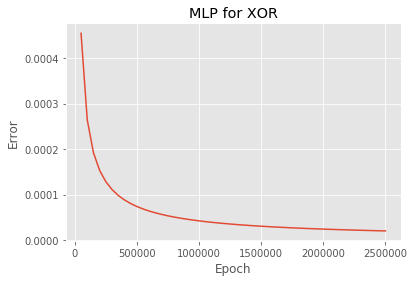

In [7]:
plt.plot([i for i in loss_message],[loss_message[i] for i in loss_message])
plt.title("MLP for XOR")
plt.xlabel('Epoch')
plt.ylabel('Error')

<h4> Check the predictions at the end of training</h4>

In [8]:
print('After:')
for i in range(len(X)):
    length = len(str(i))
    print('Target:' + str(y[i]) + '\t' + 'Output:' + str(mlp1.forward(X[i])))

After:
Target:[0]	Output:[ 0.]
Target:[1]	Output:[ 0.9973459]
Target:[1]	Output:[ 0.9973459]
Target:[0]	Output:[-0.00810698]


---------

<h3> Task2 - Multilayer Perceptron (MLP) for Sine function: </h3>

<h4> Prepare the data set, generate 50 vectors</h4>

In [9]:
x_sin = []
for i in range (50):
    vector = list(np.random.uniform(-1.0, 1.0, 4))
    x_sin.append(vector)
x_sin = np.array(x_sin)
y = np.array(np.sin([i[0] - i[1] + i[2] - i[3] for i in x_sin]))
y_sin = np.reshape(y, (50, 1))

<h4> Split the data set (40 examples for training, 10 examples for testing)</h4>

In [10]:
x_sin_train = x_sin[:40]
x_sin_test = x_sin[40:]
y_sin_train = y_sin[:40]
y_sin_test= y_sin[40:]

In [11]:
x_sin_train.shape

(40, 4)

In [12]:
y_sin_train.shape

(40, 1)

In [13]:
x_sin_test.shape

(10, 4)

In [14]:
y_sin_test.shape

(10, 1)

<h4> Construct a mlp instance with (4 input layer units, 5 hidden layer units, 1 output layer unit) </h4>

In [15]:
mlp2 = MLP(4,5,1)

<h4> The training process</h4>

In [16]:
loss_message2 = dict()
print("***********************Model training start***********************")
for i in range(160000):
    mlp2.train(x_sin_train, y_sin_train, 0.01)
    loss = np.mean(np.square(y_sin_train - mlp2.forward(x_sin_train)))
    if (i + 1) % 2000 == 0:
        loss_message2[(i+1)] = loss
        print(str(i + 1) + '(Epoch)\t' + 'Error:\t' + str(loss)) 
print("***********************Model training end***********************")

***********************Model training start***********************
2000(Epoch)	Error:	0.0151986884867
4000(Epoch)	Error:	0.015059360289
6000(Epoch)	Error:	0.0148648250299
8000(Epoch)	Error:	0.0145307404161
10000(Epoch)	Error:	0.0136797834218
12000(Epoch)	Error:	0.0107706284526
14000(Epoch)	Error:	0.00626107972781
16000(Epoch)	Error:	0.00411909380781
18000(Epoch)	Error:	0.00330239741717
20000(Epoch)	Error:	0.00283342136497
22000(Epoch)	Error:	0.00251687712169
24000(Epoch)	Error:	0.00230112188055
26000(Epoch)	Error:	0.00214662332268
28000(Epoch)	Error:	0.00202811481086
30000(Epoch)	Error:	0.00193181111324
32000(Epoch)	Error:	0.00184978644591
34000(Epoch)	Error:	0.00177737105615
36000(Epoch)	Error:	0.00171179279599
38000(Epoch)	Error:	0.0016513331652
40000(Epoch)	Error:	0.00159482236153
42000(Epoch)	Error:	0.00154139966767
44000(Epoch)	Error:	0.00149043425124
46000(Epoch)	Error:	0.00144151105861
48000(Epoch)	Error:	0.00139442756884
50000(Epoch)	Error:	0.00134917487847
52000(Epoch)	Error:	

<h4> Plot the error through the training process</h4>

Text(0,0.5,'Error')

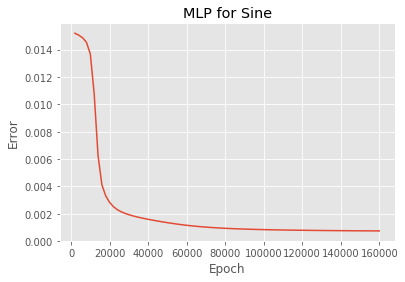

In [17]:
plt.plot([i for i in loss_message2],[loss_message2[i] for i in loss_message2])
plt.title("MLP for Sine")
plt.xlabel('Epoch')
plt.ylabel('Error')

<h4> Check the predictions by using the "test set"</h4>

In [18]:
print('\nUsing test data for Testing:\n')
for i in range(len(x_sin_test)):
    print('Target:\t' + str(y_sin_test[i]))
    print('Output:\t' + str(mlp2.forward(x_sin_test[i])))


Using test data for Testing:

Target:	[-0.10332029]
Output:	[ 0.02225276]
Target:	[ 0.98297544]
Output:	[ 0.96761798]
Target:	[-0.5847643]
Output:	[-0.83626184]
Target:	[-0.01460862]
Output:	[-0.07653286]
Target:	[ 0.40995253]
Output:	[ 0.58844166]
Target:	[ 0.65873697]
Output:	[ 0.95050431]
Target:	[-0.98133745]
Output:	[-0.97352194]
Target:	[ 0.98439373]
Output:	[ 0.98286717]
Target:	[ 0.95936818]
Output:	[ 0.95003797]
Target:	[-0.96977209]
Output:	[-0.95498197]


<h4> Output the error on test set</h4>

In [19]:
error_test = np.mean(np.square(y_sin_test - mlp2.forward(x_sin_test)))
print(error_test)

0.0200445828905


<h4> Discussion - compare the training error with the testing error </h4>

As we can see, at the end of training process, the training error is at plateau nearly 0.0007. However, by testing using the test set, we get the mean squre error (MSD) nearly 0.02, which is much great than the training error. This is not a satisfactory model, the problem here we called it **overfitting**. In general, it happens when the training model tends to fit the training sets as much as possible and cause to the lack ability of **generalization to unseen data**. 

In our training process, we only have 40 examples for training, which is very tiny, the small size of training set might be the main reason here to cause overfitting. Normally, we have several ways to avoid overfitting. For example, here we can try to generate more data for training. In addition, another typical way to avoid overfitting is using cross validation in training and evaluating the model.

------